In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('D:\hack\dataset\Train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory('D:\hack\dataset\Validation',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [14]:
# Assuming you have already defined your train generator as mentioned in your code
# Print the class labels in the train generator
print("Class labels in the train generator:")
print(train_generator.class_indices)
# If you want to print the classes in a more readable format
classes_train = list(train_generator.class_indices.keys())
print("Classes in the train generator:")
print(classes_train)

Class labels in the train generator:
{'Healthy': 0, 'Powdery': 1, 'Rust': 2}
Classes in the train generator:
['Healthy', 'Powdery', 'Rust']


In [15]:
# Assuming you have already defined your test generator as mentioned in your code

# Print the class labels in the test generator
print("Class labels in the test generator:")
print(valid_generator.class_indices)

# If you want to print the classes in a more readable format
classes = list(valid_generator.class_indices.keys())
print("Classes in the test generator:")
print(classes)


Class labels in the test generator:
{'Healthy': 0, 'Powdery': 1, 'Rust': 2}
Classes in the test generator:
['Healthy', 'Powdery', 'Rust']


In [16]:
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(layers.Conv2D(256, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(layers.Conv2D(384, (3, 3), activation='relu'))
model.add(layers.Conv2D(384, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))  # Assuming you have 11 classes
target_size=(224, 224)
print(train_generator.image_shape)
model.summary()


(224, 224, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 384)         885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6

In [17]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
for batch_x, batch_y in train_generator:
    print("Batch X shape:", batch_x.shape)  # Check the shape of input data
    print("Batch Y shape:", batch_y.shape)  # Check the shape of labels
    preds = model.predict(batch_x)
    print("Predictions shape:", preds.shape)  # Check the shape of predictions
    break  # Break after the first batch for inspection


Batch X shape: (32, 224, 224, 3)
Batch Y shape: (32, 3)
1/1 [==============================] - 0s 290ms/step
Predictions shape: (32, 3)


In [20]:

history=model.fit(train_generator,
          epochs=25,
          validation_data=valid_generator)

Epoch 1/25

42/42 [==============================] - 232s 6s/step - loss: 1.0899 - accuracy: 0.3707 - val_loss: 1.0061 - val_accuracy: 0.4667
Epoch 2/25
42/42 [==============================] - 240s 6s/step - loss: 0.8194 - accuracy: 0.5741 - val_loss: 0.6962 - val_accuracy: 0.5833
Epoch 3/25
42/42 [==============================] - 137s 3s/step - loss: 0.7191 - accuracy: 0.6248 - val_loss: 0.7430 - val_accuracy: 0.5833
Epoch 4/25
42/42 [==============================] - 83s 2s/step - loss: 0.7030 - accuracy: 0.6596 - val_loss: 0.9601 - val_accuracy: 0.4333
Epoch 5/25
42/42 [==============================] - 85s 2s/step - loss: 0.7145 - accuracy: 0.6331 - val_loss: 0.6940 - val_accuracy: 0.6000
Epoch 6/25
42/42 [==============================] - 89s 2s/step - loss: 0.7026 - accuracy: 0.6452 - val_loss: 0.6658 - val_accuracy: 0.5667
Epoch 7/25
42/42 [==============================] - 87s 2s/step - loss: 0.6562 - accuracy: 0.6725 - val_loss: 0.6779 - val_accuracy: 0.6000
Epoch 8/25
42/42

In [22]:
epoch = np.argmax(history.history['val_accuracy']) + 1

# Retrieve the highest validation accuracy
accuracy = history.history['val_accuracy'][epoch - 1]

print(f'Test Accuracy: {accuracy*100:.4f}%')

Test Accuracy: 91.6667%


In [ ]:
model.save("epic model.h5")

c:\Users\aruna\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


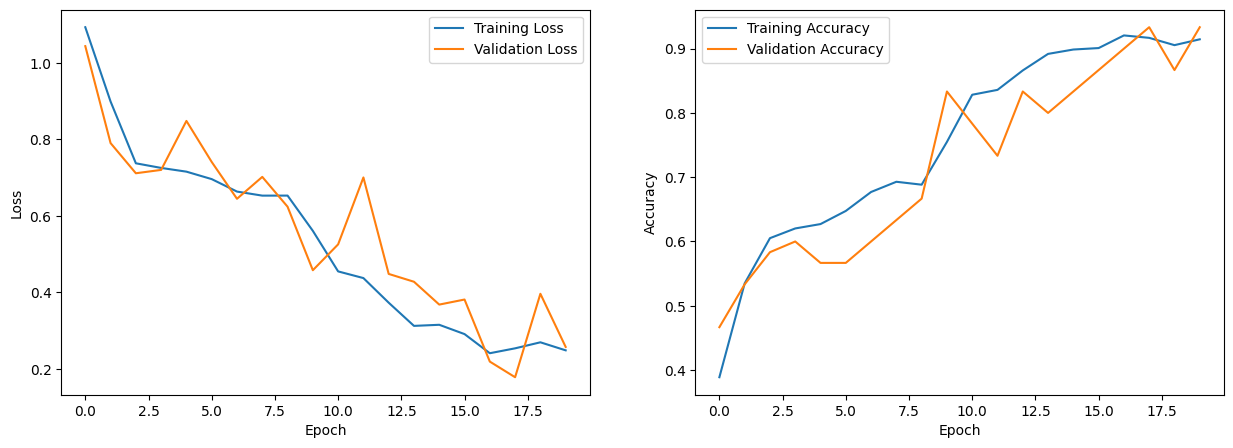

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the smoothed training loss
axs[0].plot(train_loss, label='Training Loss')
axs[0].plot(val_loss, label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot the smoothed training accuracy
axs[1].plot(train_acc, label='Training Accuracy')
axs[1].plot(val_acc, label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

testing 

In [ ]:
import tensorflow as tf

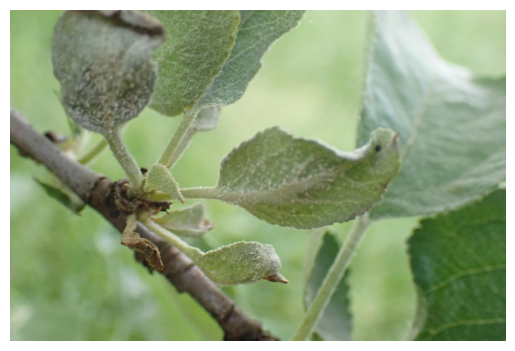

1/1 [==============================] - 0s 103ms/step
Predicted Class: Powdery


In [ ]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
# Load the saved model
model = tf.keras.models.load_model('D:\hack\epic model.h5')

# Load and preprocess a test image
test_image_path = 'dataset/Test/Powdery/9fa9b13467c0961d.jpg'
# Load the image
img = Image.open(test_image_path)
# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()
test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255.0  # Normalize the pixel values


class_name_dict = {
    0: 'Healthy',
    1: 'Powdery',
    2: 'Rust',

}


# Make predictions
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)
predicted_class_name = class_name_dict[predicted_class]

# Display the predicted class name
print(f"Predicted Class: {predicted_class_name}")